# TASK 1: "Titanic Survival Prediction Machine Learning Model"

In [1]:
#1. Getting the data ready
import pandas as pd
titanic_df = pd.read_csv("titanic_data.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#2 Fill missing data of columns "Age" and "Fare"
titanic_df["Age"].fillna(titanic_df["Age"].mean() , inplace=True)
titanic_df["Fare"].fillna(titanic_df["Fare"].mean() , inplace = True)

#3 Remove unwanted columns like "PassengerId" , "Name" , "Ticket" and "Cabin".
titanic_df.drop(["PassengerId" , "Name" , "Ticket" , "Cabin"] ,axis=1, inplace = True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [10]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:

#4 Converting non numeric columns into numbers ("Embarked" , "Sex") using Pipeline
titanic_df['Embarked'] = titanic_df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
titanic_df['Sex'] = titanic_df['Sex'].map( {'female': 1,'male':0}).astype(int)

#5 Splitting our data into x (feature varaibles) and y into (target variable)

x = titanic_df.drop("Survived" , axis=1)
y = titanic_df["Survived"]


In [26]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


In [28]:
#6 Checking data type
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [32]:
#7 Choosing our estimator/model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#8 Splitting data into training and test sets

from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

#9 Fitting our model
model.fit(x_train , y_train)

#10 Making Predictions with our model
y_preds = model.predict(x_test)
y_preds

# '0' means not survived and '1' means survived.

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [33]:
#11 Evaluating our Classification Model using different metrics
y_probs = model.predict_proba(x_test)
y_probs_positive = y_probs[:,1]  # shows probabilities of only survived passengers

from sklearn.metrics import roc_curve
fpr , tpr , threshold = roc_curve(y_test , y_probs_positive)


### Plotting ROC Curve

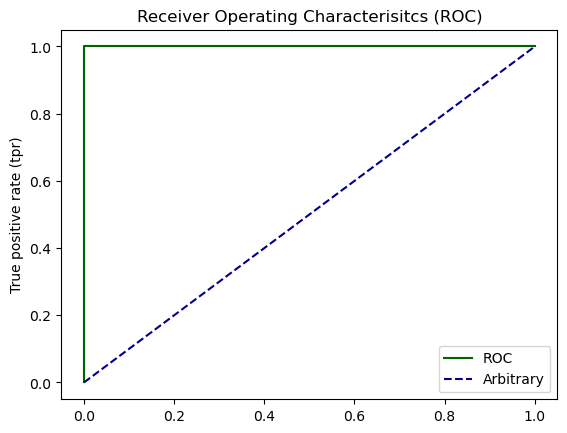

In [34]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

# Defining function

def plot_roc_curve (fpr , tpr):
    """
    plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) 
    of a model
    """
    # Plot ROC curve
    plt.plot(fpr , tpr , color = "darkgreen" , label = "ROC")
    
    # Plot an arbitrary line with no predictive power
    plt.plot([0,1],[0,1] , color="darkblue" , linestyle = "--" , label = "Arbitrary")
    
    # Customize the plot
    plt.xlabel=("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characterisitcs (ROC)")
    plt.legend()
    plt.show()
    
# Calling the function now

plot_roc_curve(fpr , tpr)

### ROC and AUC Score

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_probs_positive) # Area Under Curve Score for above plot^

1.0